In [1]:
#khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
#Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,34.008319,11.607943,9.312596,2.452278
1,39.680335,3.414421,13.472720,19.455454
2,40.751499,2.913277,9.509745,-2.445863
3,59.509936,37.731433,7.273268,7.511788
4,53.157095,8.772961,13.156973,7.114968
...,...,...,...,...
995,58.011008,3.179617,11.016338,9.512077
996,33.020503,21.988040,8.186139,-7.646987
997,55.246473,3.409014,12.898883,6.987093
998,45.923585,61.752628,9.915872,2.048731


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,34.008319,11.607943,9.312596,2.452278,25.002588
1,39.680335,3.414421,13.472720,19.455454,16.866562
2,40.751499,2.913277,9.509745,-2.445863,14.673435
3,59.509936,37.731433,7.273268,7.511788,17.508238
4,53.157095,8.772961,13.156973,7.114968,19.337662


<AxesSubplot:ylabel='Density'>

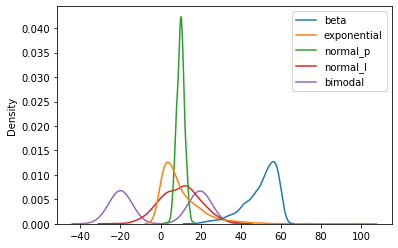

In [6]:
#Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [7]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.150145,9.993734,9.966772,10.016096,-0.187405
std,8.225316,10.188036,1.953338,9.888011,20.105362
min,17.663565,0.009348,2.785715,-23.595167,-28.908013
25%,45.966950,2.909994,8.649861,2.836868,-19.955451
50%,52.529331,6.727853,10.009586,10.185329,-1.201542
75%,56.444922,14.070738,11.262268,16.798995,19.609753
max,59.980202,99.931581,16.246590,38.297499,29.314866


<AxesSubplot:ylabel='Density'>

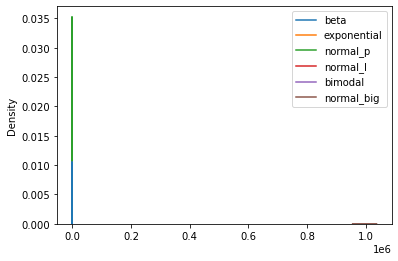

In [9]:
#Thêm một đặc trưng với giá trị lớn hơn nhiều
#Khi thêm đặc trưng này, 
#do giá trị của chúng khác xa với khoảng giá trị ban đầu nên nếu ta biểu diễn bằng đồ thị thì các dữ liệu lúc trước sẽ co cụm lại 1 bênIn [ ]:

normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

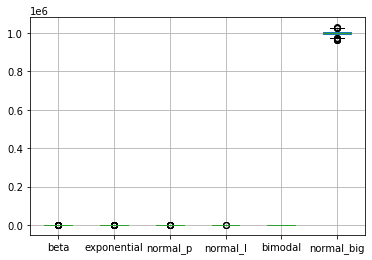

In [10]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [13]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [14]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.963439,0.158521,-0.335070,-0.765331,1.253526,-0.770262
1,-1.273513,-0.646111,1.795748,0.955104,0.848654,0.739570
2,-1.143220,-0.695325,-0.234090,-1.260941,0.739518,-0.077771
3,1.138494,2.723938,-1.379614,-0.253394,0.880586,1.147576
4,0.365756,-0.119884,1.634022,-0.293545,0.971623,1.684993


<AxesSubplot:ylabel='Density'>

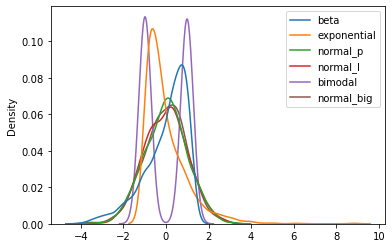

In [15]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [16]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.413625e-16,9.370282e-17,7.808754e-16,-1.228455e-16,-2.936540e-16,9.191536e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.951561e+00,-9.805013e-01,-3.678141e+00,-3.400894e+00,-1.429220e+00,-3.806012e+00
25%,-5.088300e-01,-6.956478e-01,-6.745224e-01,-7.264170e-01,-9.837146e-01,-6.488910e-01
50%,2.893964e-01,-3.207208e-01,2.192902e-02,1.712355e-02,-5.046636e-02,5.779975e-02
75%,7.656760e-01,4.003759e-01,6.635534e-01,6.863153e-01,9.851632e-01,6.708076e-01
max,1.195696e+00,8.832208e+00,3.216525e+00,2.861602e+00,1.468117e+00,2.985190e+00


<AxesSubplot:>

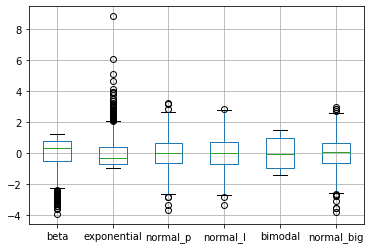

In [17]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()